In [1]:
import random
import cv2
import albumentations as A
import matplotlib.pyplot as plt

### 복잡한 Augmentation 파이프라인 정의

In [2]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    plt.imshow(img)

In [3]:
image = cv2.imread("./data/01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[3.96, 183.38, 200.88, 214.03], [468.94, 92.01, 171.06, 248.45]]
category_ids = [0, 1]
category_id_to_name = {0: 'cat', 1: 'dog'}

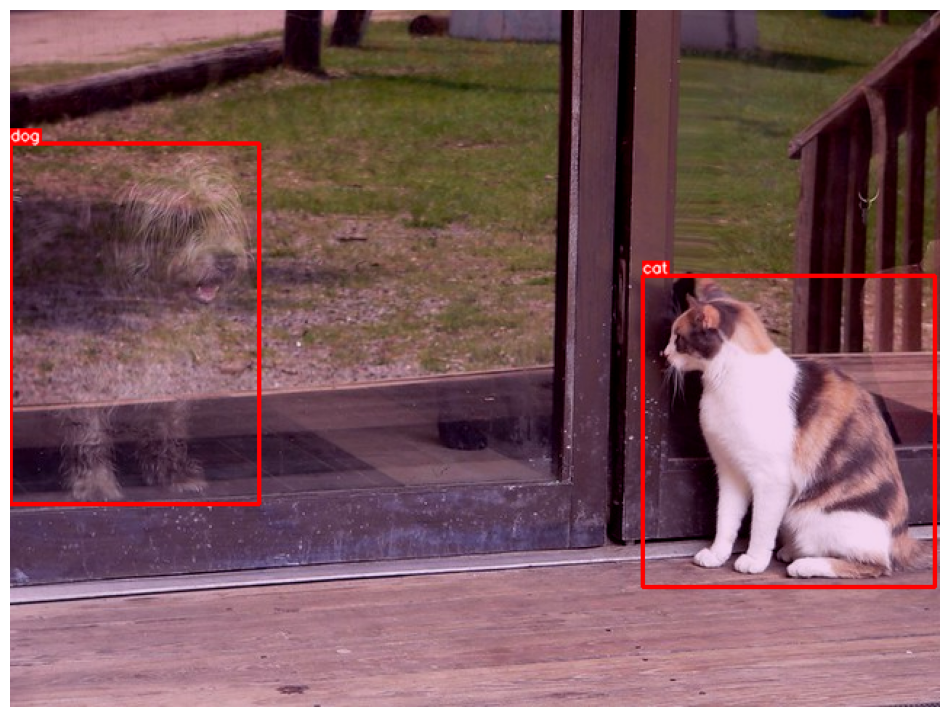

In [4]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3)
    ], 
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

### 공간적 보강

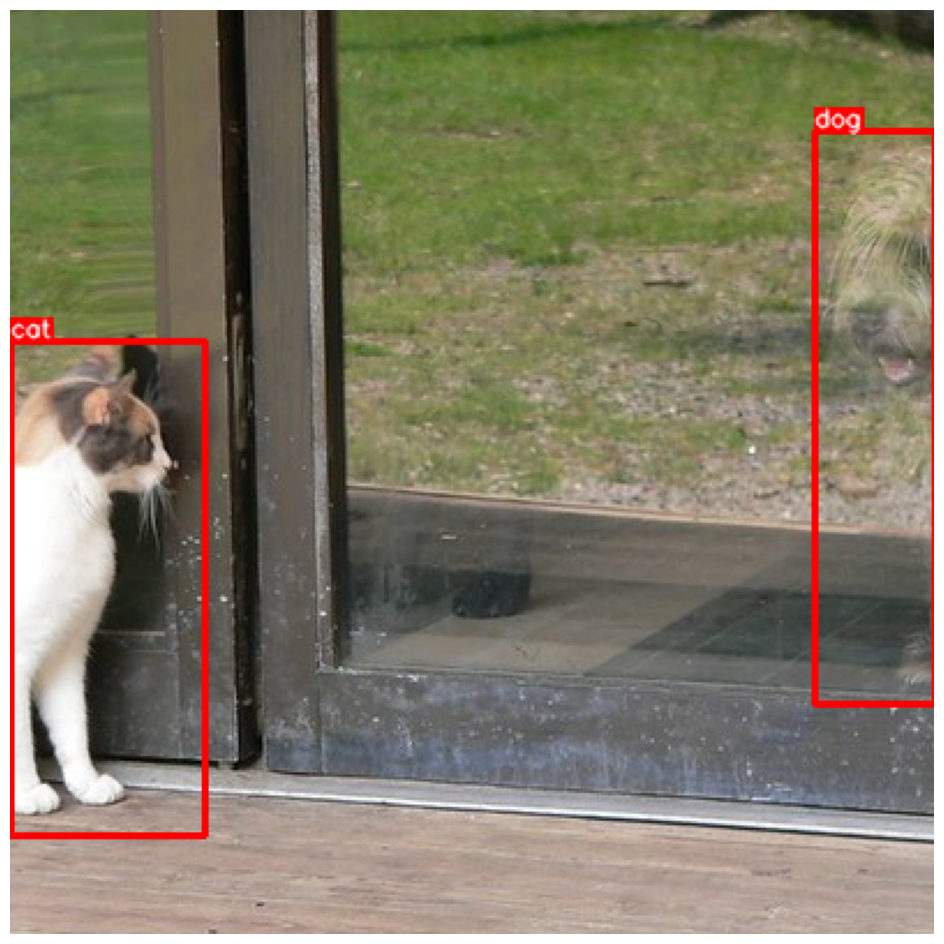

In [5]:
transform = A.Compose(
    [A.CenterCrop(height=400, width=400, p=1)], 
    bbox_params = A.BboxParams(format='coco', min_area=4500, label_fields=['category_ids']),
)

transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)